# Getting data from NOAA webpage

In [1]:
!wget -O land_global_temperature_anomaly-1880-2015.csv https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv

--2017-01-04 13:27:29--  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv
Resolviendo www.ncdc.noaa.gov (www.ncdc.noaa.gov)... 205.167.25.171, 205.167.25.172, 2610:20:8040:2::172, ...
Conectando con www.ncdc.noaa.gov (www.ncdc.noaa.gov)[205.167.25.171]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [text/plain]
Grabando a: “land_global_temperature_anomaly-1880-2015.csv”

    [ <=>                                   ] 23.796       135KB/s   en 0,2s   

2017-01-04 13:27:30 (135 KB/s) - “land_global_temperature_anomaly-1880-2015.csv” guardado [23796]



In [5]:
import numpy as np

In [6]:
!head land_global_temperature_anomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [8]:
np.loadtxt(fname='land_global_temperature_anomaly-1880-2015.csv', delimiter=',', skiprows=4)

array([[  1.88001000e+05,  -1.53800000e-01],
       [  1.88002000e+05,  -5.77100000e-01],
       [  1.88003000e+05,  -7.25000000e-01],
       ..., 
       [  2.01510000e+05,   1.32120000e+00],
       [  2.01511000e+05,   1.28280000e+00],
       [  2.01512000e+05,   1.87220000e+00]])

In [9]:
T_land=np.loadtxt(fname='land_global_temperature_anomaly-1880-2015.csv', delimiter=',', skiprows=4)

In [11]:
np.shape(T_land)

(1632, 2)

In [12]:
from matplotlib import pyplot
%matplotlib inline

/home/lmc17/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/lmc17/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


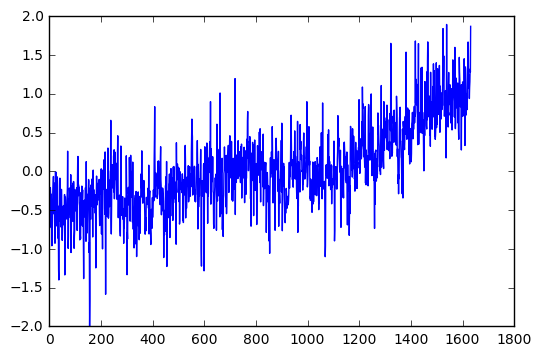

In [16]:
pyplaaot.plot(T_land[:,1]); #No ugly comment --> ;

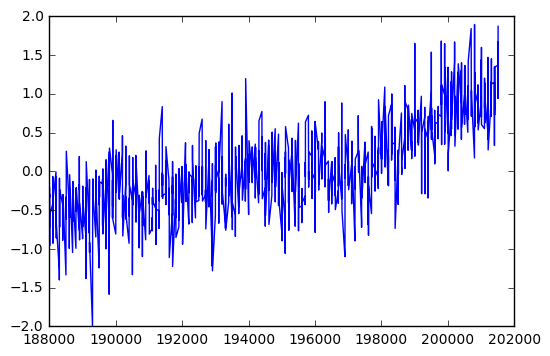

In [17]:
pyplot.plot(T_land[:,0],T_land[:,1]);

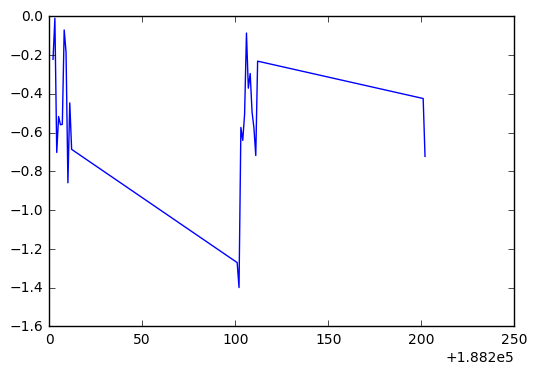

In [18]:
pyplot.plot(T_land[25:50,0],T_land[25:50,1]);

# Using `numpy.arange()` for creating our date-array 

In [20]:
date= np.arange('1880','2016', dtype=('datetime64[M]'))

In [21]:
print(date)

['1880-01' '1880-02' '1880-03' ..., '2015-10' '2015-11' '2015-12']


In [22]:
dummy = np.linspace(1,1632,1632)
print(dummy)

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   1.63000000e+03
   1.63100000e+03   1.63200000e+03]


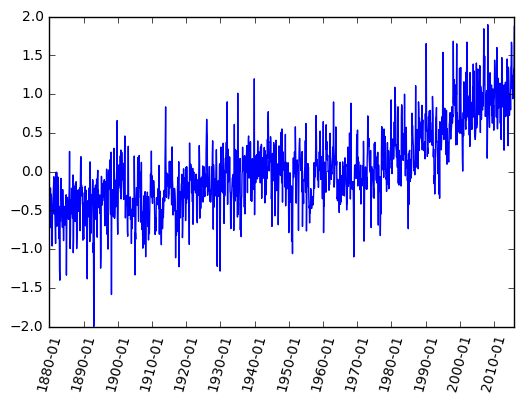

In [24]:
pyplot.xticks(dummy[::12*10], date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:,1]);

In [29]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

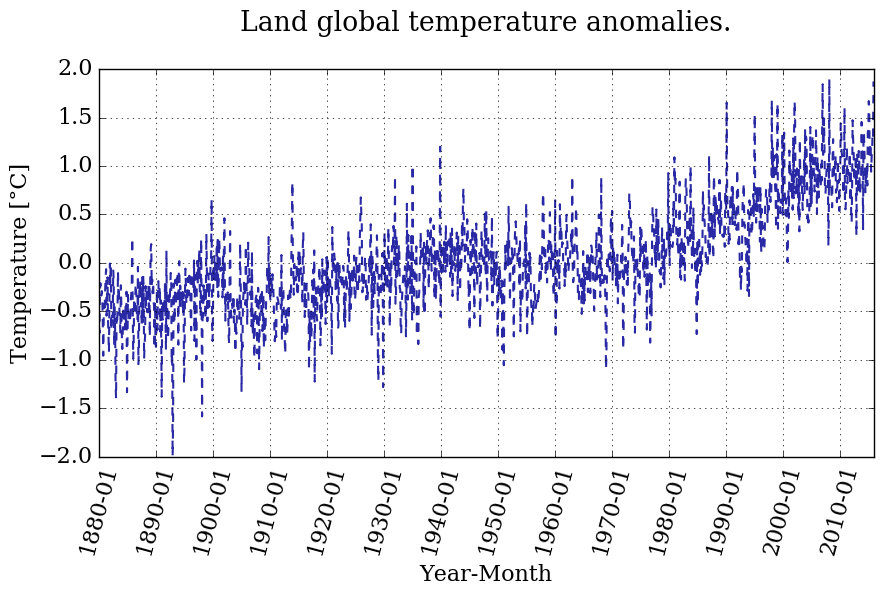

In [53]:
pyplot.figure(figsize=(10,5))
pyplot.xticks(dummy[::12*10], date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:,1], color='#2929a6', ls='--', lw=1.5)
pyplot.title('Land global temperature anomalies.\n')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Temperature [°C]')
pyplot.grid()
pyplot.savefig('prueba.pdf')

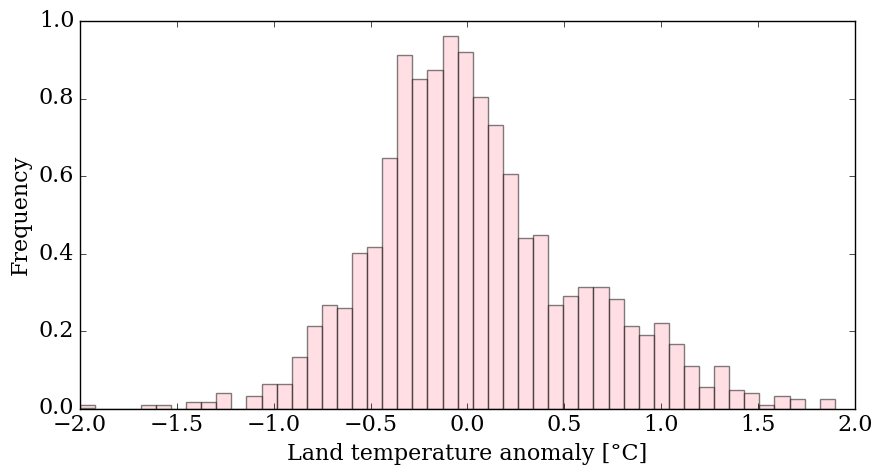

In [62]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], bins=50, normed=True, color='pink', alpha=0.5)
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Frequency');

# Let's do some stats

In [66]:
mean_T =np.mean(T_land[:,1])
median_T = np.median(T_land[:,1])

print('The mean value is {:.5} and the median is {:.5}'.format(mean_T, median_T))

The mean value is 0.04031 and the median is -0.0276


In [68]:
variance_T = np.var(T_land[:,1])
sigma_T = np.sqrt(variance_T)
print('The variance is {:.5} and the standard deviation {:.5}'.format(variance_T,
                                                                      sigma_T))

The variance is 0.28041 and the standard deviation 0.52954


In [69]:
from scipy import stats

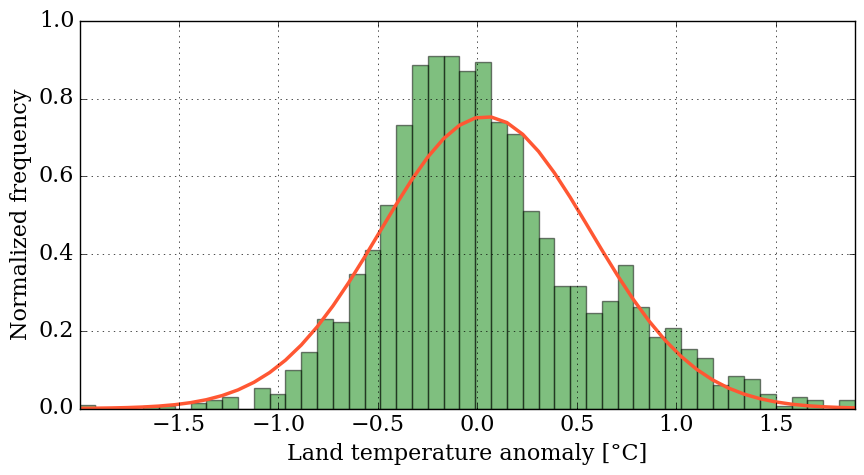

In [75]:
bins = np.linspace(min(T_land[:,1]), max(T_land[:,1]), 50)

pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], bins, normed=True, facecolor='g', alpha=0.5)
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T),
            color='#ff5733', ls='-', lw=2.5)
pyplot.xlim(min(T_land[:,1]), max(T_land[:,1]))
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency')
pyplot.grid();


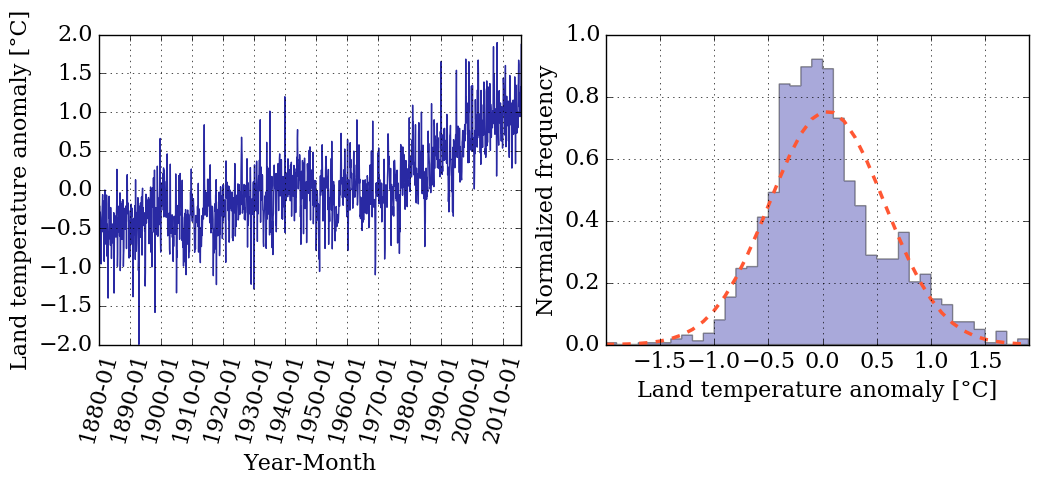

In [80]:
pyplot.figure(figsize=(12,4))  


#FIRST PLOT
pyplot.subplot(121)   # creates a grid of 1 row, 2 columns and 
                      # selects the first plot

pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy,T_land[:,1], color='#2929a3', ls='-', lw=1) 
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid()


#SECOND PLOT
pyplot.subplot(122)            # prepares for the second plot

bins = np.linspace(min(T_land[:,1]), max(T_land[:,1]), 40)
pyplot.hist(T_land[:,1], bins, normed=True, color='#2929a3',
            alpha=0.4, histtype= 'stepfilled')
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T),
            color='#ff5733', ls='--', lw=2.5)
pyplot.xlim(min(T_land[:,1]), max(T_land[:,1]))
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency')
pyplot.grid();

# Smooth the data 

In [88]:
def smooth_data(N, data):
    """
    Returns smoothed data using a sliding_moving avarage.

    Arguments:
    ----------
    N (int)       : amount of data values we want to average.
    data (array)  : array of data we want to smooth.


    Returns:
    --------
    smooth (array): array with smoothed data.
    """

    window = np.ones(N)/N
    smooth = np.convolve(data, window, 'same')

    return smooth

In [89]:
?np.convolve

In [90]:
smooth = smooth_data(12, T_land[:,1])

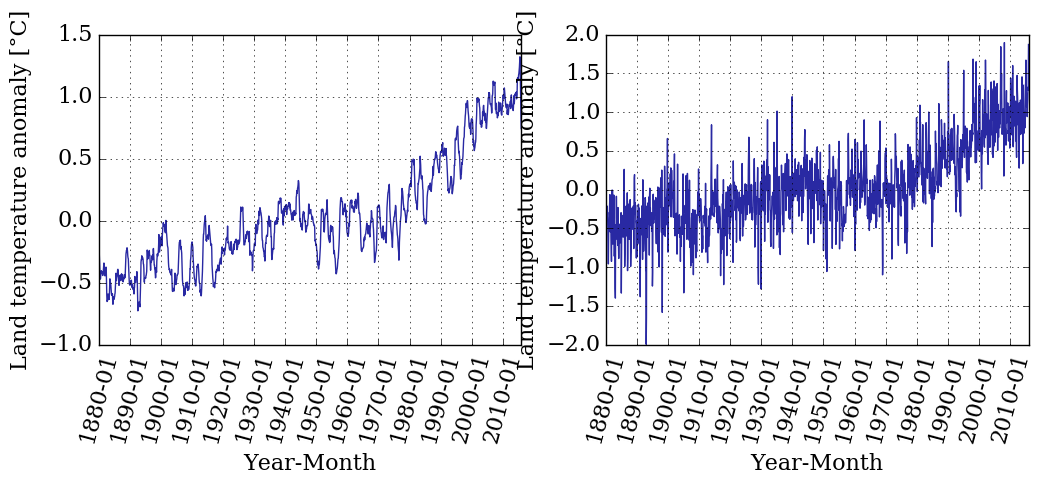

In [92]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(121)
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy,smooth, color='#2929a3', ls='-', lw=1) 
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid()

pyplot.subplot(122)
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy,T_land[:,1], color='#2929a3', ls='-', lw=1) 
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid()

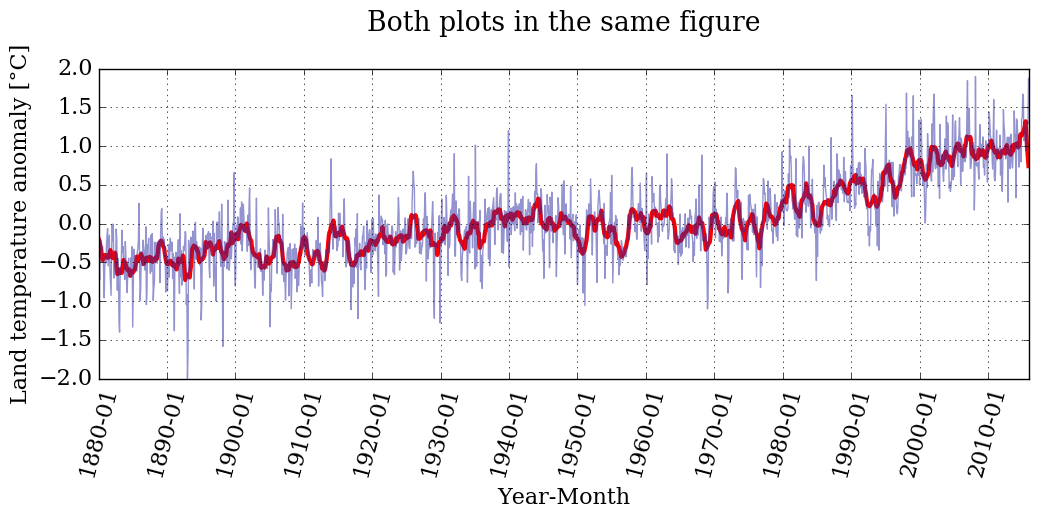

In [98]:
pyplot.figure(figsize=(12,4))
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy,smooth, color='red', ls='-', lw=3) 
pyplot.plot(dummy,T_land[:,1], color='#2929a3', ls='-', lw=1, alpha=0.5) 
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.title('Both plots in the same figure\n')
pyplot.grid()


# Linear regression (easy way) 

In [124]:
m, b, c, d, e, f, g, h, y, j, k = np.polyfit(dummy, T_land[:,1], 10)
f_linear = np.poly1d((m, b, c, d, e, f, g, h, y, j, k)) 
print(f_linear)

           10             9             8             7             6
1.138e-28 x  - 9.741e-25 x + 3.597e-21 x - 7.483e-18 x + 9.587e-15 x
              5             4             3             2
 - 7.757e-12 x + 3.905e-09 x - 1.159e-06 x + 0.0001823 x - 0.01175 x - 0.2981


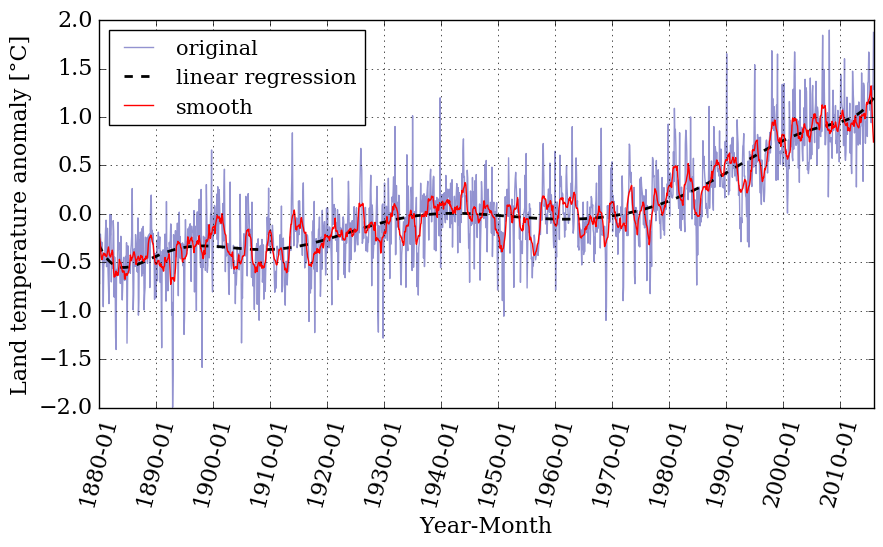

In [125]:
pyplot.figure(figsize=(10, 5))

pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, T_land[:,1], color='#2929a3', ls='-', lw=1, alpha=0.5, label='original') 
pyplot.plot(dummy, f_linear(dummy), 'k--', linewidth=2,
            label='linear regression')
pyplot.plot(dummy,smooth, color='red', ls='-', lw=1, label='smooth') 
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

In [126]:
?%timeit